In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from bar_model import BarModel
from efbp import run_simulation
from util import detect_cycle

In [27]:
rng = np.random.default_rng(24)
n = 1000
agents = 100
x_min = -1
x_max = 1

In [25]:
def compare(strategies):
    start = rng.choice(101, size=4)

    model = BarModel(start, strategies, x_min, x_max)
    hist, cases = model.iterate(start, agents, n)
    cycle_length = detect_cycle(hist, 2)
    print(f"Cycle in the mean field model: {hist[-cycle_length:]}")

    cycle_length = detect_cycle(cases, 2)
    print(f"Cycle of cases in the mean field model: {cases[-cycle_length:]}")

    hist_sim, _, _ = run_simulation(
        agents = agents,
        threshold = 60,
        strategies = strategies,
        # number of weeks back in predictor function
        # AND number of weeks back to look when selecting a predictor
        memory = 2,
        # number of rounds to run the simulation
        n_iter = n,
        # current options are "unbiased", "uniform"
        distribution="unbiased",
        # random seed for numpy
        seed=rng.choice(10000)
    )
    
    hist_sim = np.hstack([start, hist_sim])

    cycle_length = detect_cycle(hist_sim, 2)
    if cycle_length:
        print(f"Cycle in the simulation: {hist_sim[-cycle_length:]}")
    else:
        print("No cycle detected in simulated data.")

    cases_sim = np.array([
        BarModel(hist_sim[i:i+4], strategies, x_min, x_max).case
        for i in range(n)
    ])

    cycle_length = detect_cycle(cases_sim, 2)
    print(f"Cycle of cases in the simulation: {cases_sim[-cycle_length:]}")
    print(f"Mean field and simulation are in the same case {(cases == cases_sim).mean() * 100}% of the time.")

    plt.figure()
    plt.plot(hist[:50])
    plt.plot(hist_sim[:50])
    plt.legend(["Mean Field", "Simulation"])
    
    plt.figure()
    plt.plot(hist[-200:])
    plt.plot(hist_sim[-200:])
    plt.legend(["Mean Field", "Simulation"])
    


## 2 Strategies

Cycle in the mean field model: [ 50   6  85  72   0  65  97  17  46 100  39  24 100  54   3  80  79   0
  61  99  23  42 100  42  17  98  58   1  76  85   0  58 100  27  40 100
  44  13  94  62   0  73  89   0  56 100  29  38 100  45  11  92  64   0
  71  92   5  53 100  33  36 100  47   8  88  68   0  68  95  12  49 100
  36  31 100]
Cycle of cases in the mean field model: [10. 15.  9. 16.  6.  9. 14. 10.  9.  3. 10. 15.  2. 10. 15.  9. 14.  6.
  9. 14. 10.  9.  3. 10. 15.  9. 10. 15.  9. 14.  5.  9.  3. 10.  9.  3.
 10. 15.  9. 10.  6.  9. 14. 10.  9.  3. 10.  9.  3. 10. 15.  9. 16.  6.
  9. 14. 10.  9.  3. 10.  9.  3. 10. 15.  9. 16.  6.  9. 14. 10.  9.  3.
 10. 13.  2.]
Cycle in the simulation: [ 45  11  92  65   0  73  93   4  53 100  30  38 100]
Cycle of cases in the simulation: [10 15  9 16  6  9 14 10  9  3 10  9  3]
Mean field and simulation are in the same case 18.9% of the time.


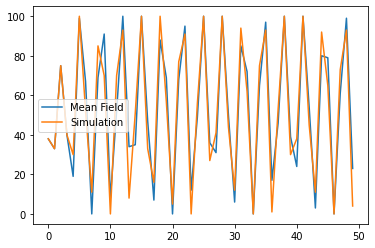

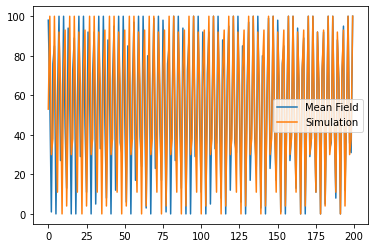

In [28]:
compare(2)

Cycle in the mean field model: [ 95  12  49 100  36  31 100  50   6  85  72   0  65  97  17  46 100  39
  24 100  54   3  80  79   0  61  99  23  42 100  42  17  98  58   1  76
  85   0  58 100  27  40 100  44  13  94  62   0  73  89   0  56 100  29
  38 100  45  11  92  64   0  71  92   5  53 100  33  36 100  47   8  88
  68   0  68]
Cycle of cases in the mean field model: [14. 10.  9.  3. 10.  9.  3. 10. 15.  9. 16.  6.  9.]
Cycle in the simulation: [ 41 100  42  14  99  59   0  76  89   0  58 100  25]
Cycle of cases in the simulation: [ 9  3 10 15  9 10 15  9 14  5  9  3 10]
Mean field and simulation are in the same case 18.099999999999998% of the time.


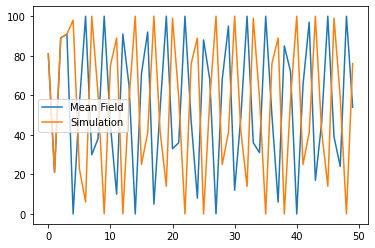

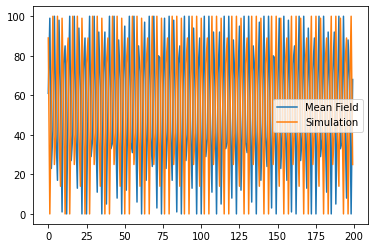

In [26]:
compare(2)

Cycle in the mean field model: [ 13  94  62   0  73  89   0  56 100  29  38 100  45  11  92  64   0  71
  92   5  53 100  33  36 100  47   8  88  68   0  68  95  12  49 100  36
  31 100  50   6  85  72   0  65  97  17  46 100  39  24 100  54   3  80
  79   0  61  99  23  42 100  42  17  98  58   1  76  85   0  58 100  27
  40 100  44]
Cycle of cases in the mean field model: [15.  9. 10. 15.  9. 14.  5.  9.  3. 10.  9.  3. 10.]
Cycle in the simulation: [ 18  43 100  46  10  86  65   0  68  98]
Cycle of cases in the simulation: [10  9  3 10 15  9 16  6  9 14]
Mean field and simulation are in the same case 18.2% of the time.


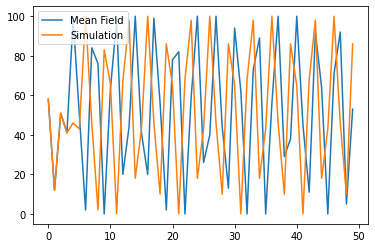

In [5]:
compare(2)

Cycle in the mean field model: [100  47   8  88  68   0  68  95  12  49 100  36  31 100  50   6  85  72
   0  65  97  17  46 100  39  24 100  54   3  80  79   0  61  99  23  42
 100  42  17  98  58   1  76  85   0  58 100  27  40 100  44  13  94  62
   0  73  89   0  56 100  29  38 100  45  11  92  64   0  71  92   5  53
 100  33  36]
Cycle of cases in the mean field model: [ 3. 10. 15.  9. 16.  6.  9. 14. 10.  9.  3. 10.  9.]
Cycle in the simulation: [ 84  73   0  67  98  16  52 100  32  17 100  50   7]
Cycle of cases in the simulation: [ 9 16  6  9 14 10  9  3 10 15  2 10 15]
Mean field and simulation are in the same case 16.6% of the time.


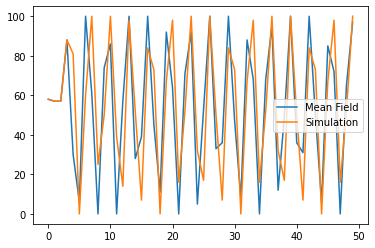

In [6]:
compare(2)

## 3 Strategies

Cycle in the mean field model: [63 99  9 63 99  9]
Cycle of cases in the mean field model: [13. 14. 10. 13. 14. 10.]
Cycle in the simulation: [ 57 100  17  55 100  22   5 100  48   7  93  51   1  93  99   0  60 100
  13]
Cycle of cases in the simulation: [ 9  3 10 13  3 10 15  2 10 15  9 16 15  9 14  5  9  3 10]
Mean field and simulation are in the same case 10.6% of the time.


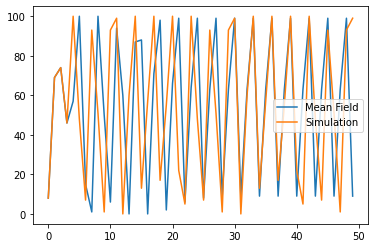

In [7]:
compare(3)

Cycle in the mean field model: [63 99  9 63 99  9]
Cycle of cases in the mean field model: [13. 14. 10. 13. 14. 10.]
Cycle in the simulation: [ 61 100  11  61 100  11]
Cycle of cases in the simulation: [13 14 10 13 14 10]
Mean field and simulation are in the same case 98.2% of the time.


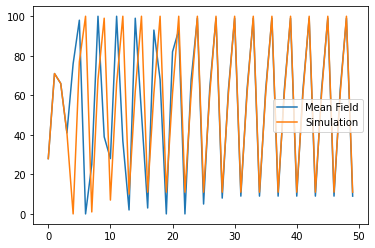

In [8]:
compare(3)

Cycle in the mean field model: [ 9 63 99  9 63 99]
Cycle of cases in the mean field model: [10. 13. 14. 10. 13. 14.]
Cycle in the simulation: [100   8  62 100   8  62]
Cycle of cases in the simulation: [14 10 13 14 10 13]
Mean field and simulation are in the same case 0.4% of the time.


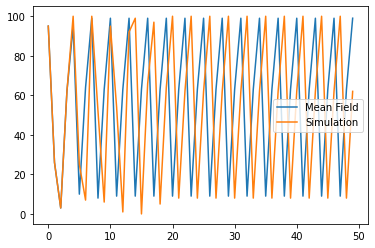

In [9]:
compare(3)

Okay, interesting...  With 3 strategies, the mean field (almost always) settles into the same cycle.  Depending on the I.C., the simulation may settle into a cycle of identical cases and attendance is similar.  Alternately, once atttendance gets into a different case than the mean field model, it may settle into a completely different cycle.

Note that what is happening isn't that mean field model and simulation have the same case all along and remain in synch.  Rather they diverge but end up in the same cycle, quite possibly with a different phase. 

TODO: How long does it take for things to hit their limit cycles?

## 5 Strategies

Cycle in the mean field model: [99  0 83 99  0 83]
Cycle of cases in the mean field model: [14.  5.  9. 14.  5.  9.]
Cycle in the simulation: [ 29   4 100  29   4 100]
Cycle of cases in the simulation: [10 15  2 10 15  2]
Mean field and simulation are in the same case 0.3% of the time.


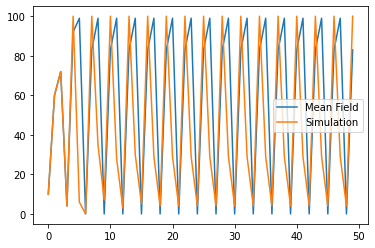

In [10]:
compare(5)

Cycle in the mean field model: [32  1 99 32  1 99]
Cycle of cases in the mean field model: [10. 15.  9. 10. 15.  9.]
Cycle in the simulation: [  1 100  34   1 100  34]
Cycle of cases in the simulation: [15  9 10 15  9 10]
Mean field and simulation are in the same case 0.1% of the time.


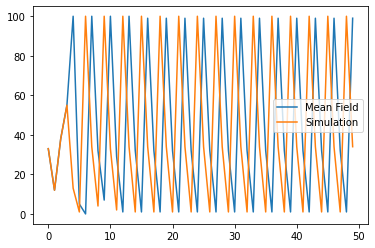

In [11]:
compare(5)

Cycle in the mean field model: [32  1 99 32  1 99]
Cycle of cases in the mean field model: [10. 15.  9. 10. 15.  9.]
Cycle in the simulation: [ 88 100   0  88 100   0]
Cycle of cases in the simulation: [ 9 14  5  9 14  5]
Mean field and simulation are in the same case 0.1% of the time.


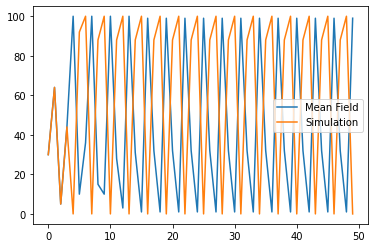

In [12]:
compare(5)

## 10 Strategies

Cycle in the mean field model: [ 0 97 99  0 97 99]
Cycle of cases in the mean field model: [ 5.  9. 14.  5.  9. 14.]
Cycle in the simulation: [100  15   0 100  15   0]
Cycle of cases in the simulation: [ 2 10 15  2 10 15]
Mean field and simulation are in the same case 0.1% of the time.


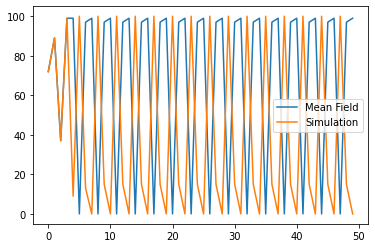

In [13]:
compare(10)

Cycle in the mean field model: [97 99  0 97 99  0]
Cycle of cases in the mean field model: [ 9. 14.  5.  9. 14.  5.]
Cycle in the simulation: [100   0  98 100   0  98]
Cycle of cases in the simulation: [14  5  9 14  5  9]
Mean field and simulation are in the same case 0.1% of the time.


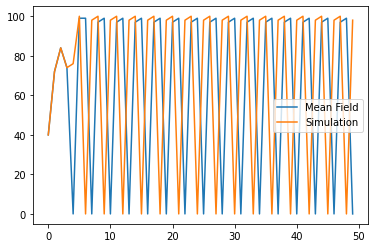

In [14]:
compare(10)

Cycle in the mean field model: [  0 100  10   0 100  10]
Cycle of cases in the mean field model: [15.  2. 10. 15.  2. 10.]
Cycle in the simulation: [ 15   0 100  15   0 100]
Cycle of cases in the simulation: [10 15  2 10 15  2]
Mean field and simulation are in the same case 0.1% of the time.


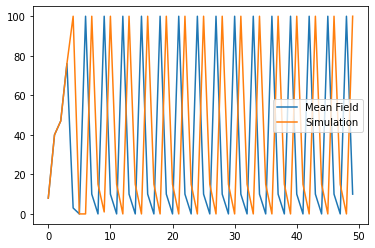

In [15]:
compare(10)

## 100 Strategies

Cycle in the mean field model: [  0   0 100   0   0 100]
Cycle of cases in the mean field model: [10. 15.  1. 10. 15.  1.]
Cycle in the simulation: [  0   0 100   0   0 100]
Cycle of cases in the simulation: [10 15  1 10 15  1]
Mean field and simulation are in the same case 100.0% of the time.


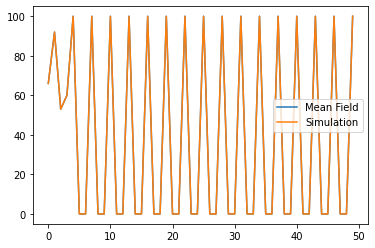

In [16]:
compare(100)

Cycle in the mean field model: [ 99 100   0  99 100   0]
Cycle of cases in the mean field model: [ 9. 14.  5.  9. 14.  5.]
Cycle in the simulation: [  0 100   0   0 100   0]
Cycle of cases in the simulation: [15  1 10 15  1 10]
Mean field and simulation are in the same case 0.2% of the time.


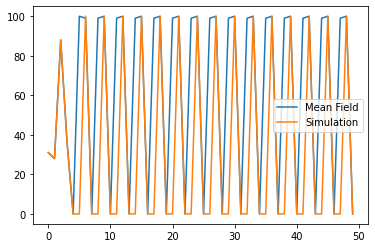

In [17]:
compare(100)

Cycle in the mean field model: [100   0  99 100   0  99]
Cycle of cases in the mean field model: [14.  5.  9. 14.  5.  9.]
Cycle in the simulation: [  0   0 100   0   0 100]
Cycle of cases in the simulation: [10 15  1 10 15  1]
Mean field and simulation are in the same case 0.2% of the time.


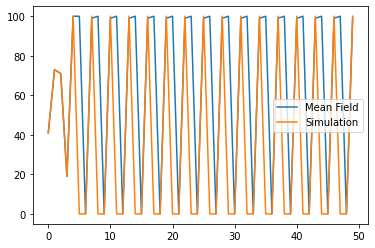

In [18]:
compare(100)

Cycle in the mean field model: [100   0  99 100   0  99]
Cycle of cases in the mean field model: [14.  5.  9. 14.  5.  9.]
Cycle in the simulation: [  0 100 100   0 100 100]
Cycle of cases in the simulation: [ 4  9 14  4  9 14]
Mean field and simulation are in the same case 0.2% of the time.


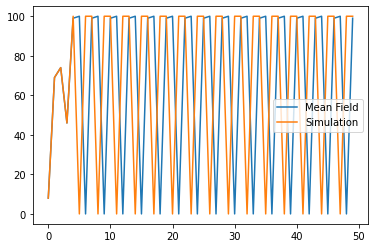

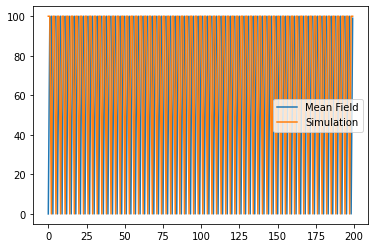

In [31]:
compare(100)

Cycle in the mean field model: [100   0  99 100   0  99]
Cycle of cases in the mean field model: [14.  5.  9. 14.  5.  9.]
Cycle in the simulation: [100   0 100 100   0 100]
Cycle of cases in the simulation: [14  4  9 14  4  9]
Mean field and simulation are in the same case 66.8% of the time.


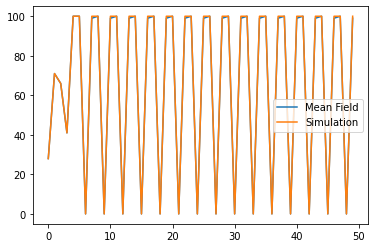

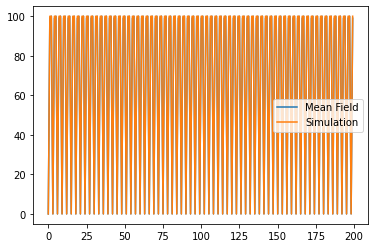

In [32]:
compare(100)

Cycle in the mean field model: [  0 100   0   0 100   0]
Cycle of cases in the mean field model: [15.  1. 10. 15.  1. 10.]
Cycle in the simulation: [  0 100 100   0 100 100]
Cycle of cases in the simulation: [ 4  9 14  4  9 14]
Mean field and simulation are in the same case 0.1% of the time.


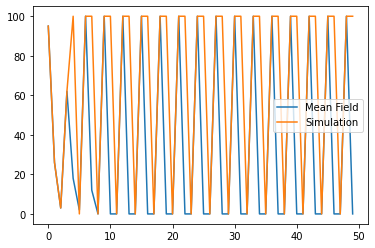

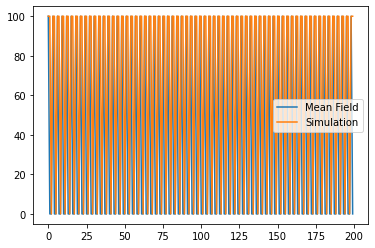

In [33]:
compare(100)

Is the variation in outcomes due to start or distribution of a's or both?

In [37]:
def run_sim(strategies, start):
    hist_sim, _, _ = run_simulation(
        agents = agents,
        threshold = 60,
        strategies = strategies,
        # number of weeks back in predictor function
        # AND number of weeks back to look when selecting a predictor
        memory = 2,
        # number of rounds to run the simulation
        n_iter = n,
        # current options are "unbiased", "uniform"
        distribution="unbiased",
        # random seed for numpy
        seed=rng.choice(10000)
    )
    
    hist_sim = np.hstack([start, hist_sim])

    cycle_length = detect_cycle(hist_sim, 2)
    if cycle_length:
        print(f"Cycle in the simulation: {hist_sim[-cycle_length:]}")
    else:
        print("No cycle detected in simulated data.")

    cases_sim = np.array([
        BarModel(hist_sim[i:i+4], strategies, x_min, x_max).case
        for i in range(n)
    ])

    cycle_length = detect_cycle(cases_sim, 2)
    print(f"Cycle of cases in the simulation: {cases_sim[-cycle_length:]}")

In [38]:
start = rng.choice(101, size=4)
print(start)

for _ in range(10):
    run_sim(10, start)

[ 5 40 72 84]
Cycle in the simulation: [ 11   0 100  11   0 100]
Cycle of cases in the simulation: [10 15  2 10 15  2]
Cycle in the simulation: [100   0  98 100   0  98]
Cycle of cases in the simulation: [14  5  9 14  5  9]
Cycle in the simulation: [ 98 100   0  98 100   0]
Cycle of cases in the simulation: [ 9 14  5  9 14  5]
Cycle in the simulation: [100   0  96 100   0  96]
Cycle of cases in the simulation: [14  5  9 14  5  9]
Cycle in the simulation: [ 16   0 100  16   0 100]
Cycle of cases in the simulation: [10 15  2 10 15  2]
Cycle in the simulation: [  1 100   7   1 100   7]
Cycle of cases in the simulation: [15  2 10 15  2 10]
Cycle in the simulation: [ 15   0 100  15   0 100]
Cycle of cases in the simulation: [10 15  2 10 15  2]
Cycle in the simulation: [ 96 100   0  96 100   0]
Cycle of cases in the simulation: [ 9 14  5  9 14  5]
Cycle in the simulation: [  0  97 100   0  97 100]
Cycle of cases in the simulation: [ 5  9 14  5  9 14]
Cycle in the simulation: [ 16   0 100  16

Well... It's pretty clear that the same I.C. will lead to different outcomes depending on the a values.  Do the a's lead to different ouutcomes depending on the I.C?

# DO THIS